<IPython.core.display.Javascript object>


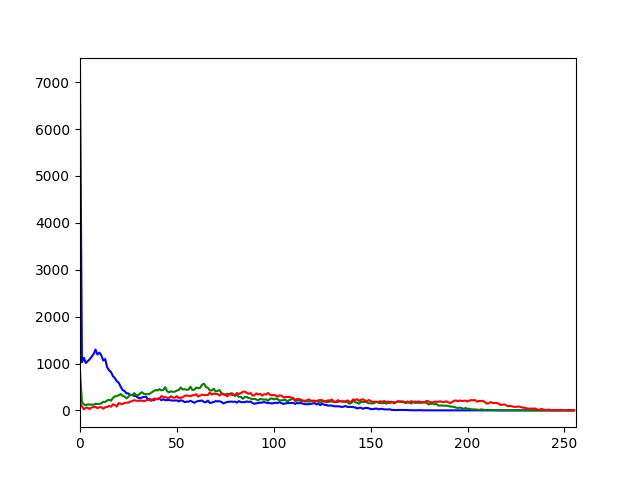

(183, 275, 3)


In [1]:
#Histogram is a graph or plot which provide us information about the intensity distribution of an image

%matplotlib notebook
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

#Load an image, in ra histogram cho theo 3 mau
img = cv.imread('tiger.jpeg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

print(img.shape)

<IPython.core.display.Javascript object>


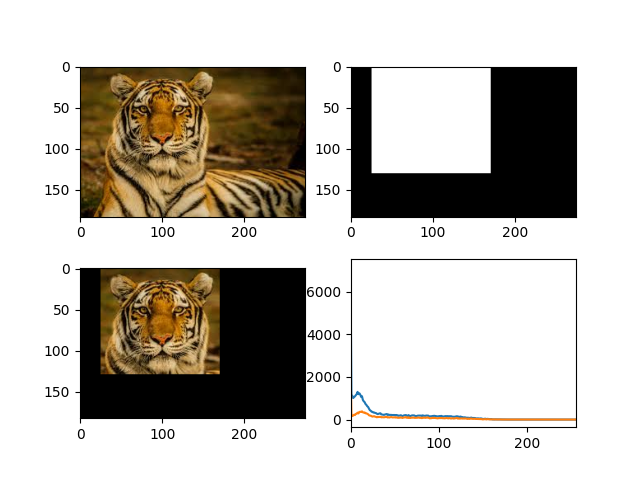

In [14]:
#Using mask exampl
#Load an image 
img = cv.imread('tiger.jpeg')
b, g, r = cv.split(img)
rgb = cv.merge([r, g, b])
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[0:130, 25:170] = 255 #mask[pixel nth - mth (height), pixel nth - mth (width)]
masked_img = cv.bitwise_and(rgb,rgb,mask = mask) #Mask is a binary matrix[m-n][m-n]
#Using bitwise and

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(rgb)
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img)
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()


<IPython.core.display.Javascript object>


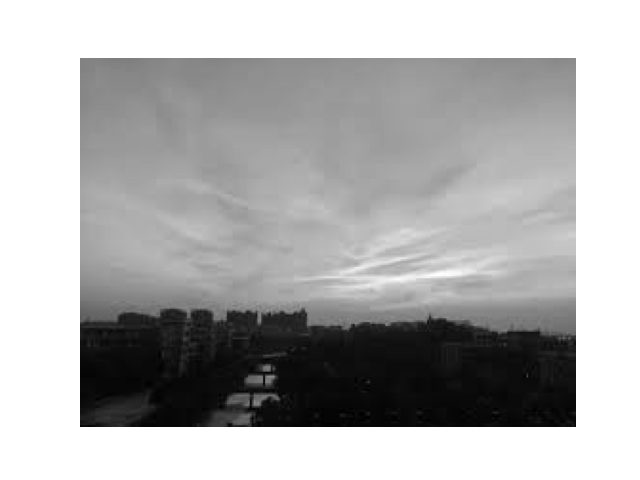

In [4]:
# This method usually increases the global contrast of many images,
# especially when the usable data of the image is represented by close contrast values.
# Through this adjustment, the intensities can be better distributed on the histogram.
# This allows for areas of lower local contrast to gain a higher contrast.
# Histogram equalization accomplishes this by effectively spreading out the most frequent intensity values.
# The method is useful in images with backgrounds and foregrounds that are both bright or both dark.
# In particular, the method can lead to better views of bone structure in x-ray images,
# and to better detail in photographs that are over or under-exposed.
# Histogram equalization will work the best when applied to images with much higher color depth
# than palette size, like continuous data or 16-bit gray-scale images.
# There are 2 ways to implement histogram equalization: Image change or palette change
# But Palette change is better in most cases

%matplotlib notebook
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('bright.jpeg',0)
plt.axis('off')
plt.imshow(img,'gray')

<IPython.core.display.Javascript object>


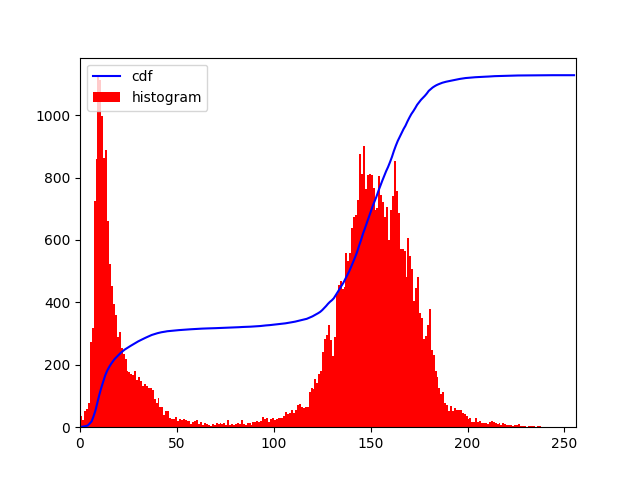

In [3]:
#Show histogram
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


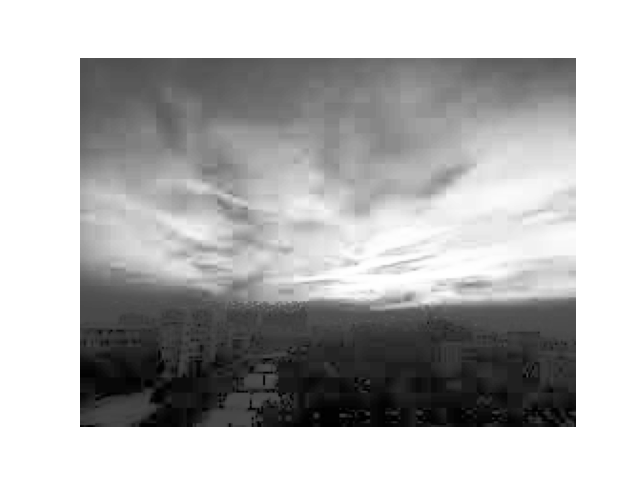

In [6]:
#Equalized histogram
equ = cv.equalizeHist(img)
plt.axis('off')
plt.imshow(equ,'gray')

<IPython.core.display.Javascript object>


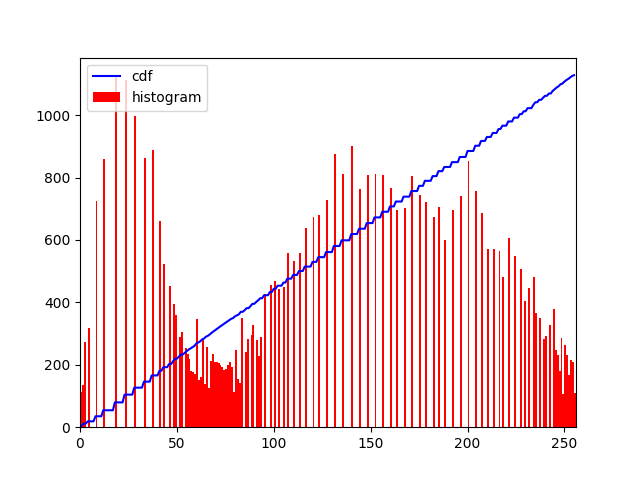

In [8]:
#Histogram after equalizating
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
plt.show()

<IPython.core.display.Javascript object>


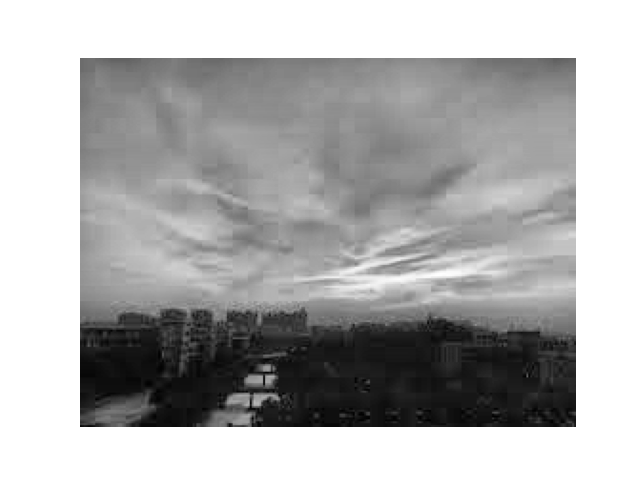

In [13]:
#It is true that the background contrast has improved after histogram equalization. 
#But in many cases, after using histogram equ, we lost most of the information there due to over-brightness.
# => adaptive histogram equalization

#How: Image is divided into small blocks called "tiles" 
# => Each of these blocks are histogram equalized
# In a small area, histogram would confine to a small region

clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(5,5))
cl1=clahe.apply(img)
plt.axis('off')
plt.imshow(cl1,'gray')


<IPython.core.display.Javascript object>


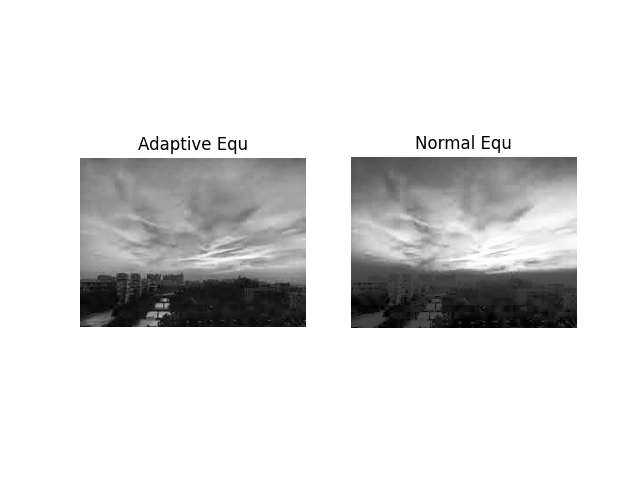

In [14]:
plt.subplot(121), plt.imshow(cl1,'gray'),plt.title('Adaptive Equ'), plt.axis("off")
plt.subplot(122), plt.imshow(equ,'gray'),plt.title('Normal Equ'), plt.axis("off")
plt.xlim([0,256])
plt.show()